# **Khai báo thư viện**

In [39]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# **Load data MNIST**

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


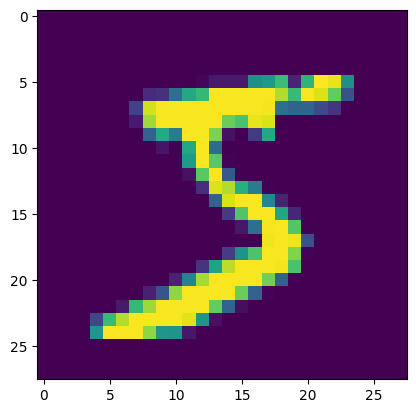

In [41]:
plt.imshow(x_train[0])
print(y_train[0])

In [42]:
print("Trong tập train có " + str((x_train.shape[0])) + ' mẫu')
print("Trong tập test có " + str((x_test.shape[0])) + ' mẫu')
print("Mỗi ảnh đều có kích thước là: " + str(x_train.shape[1]) + " x " + str(x_train.shape[2]))

Trong tập train có 60000 mẫu
Trong tập test có 10000 mẫu
Mỗi ảnh đều có kích thước là: 28 x 28


# **Model**

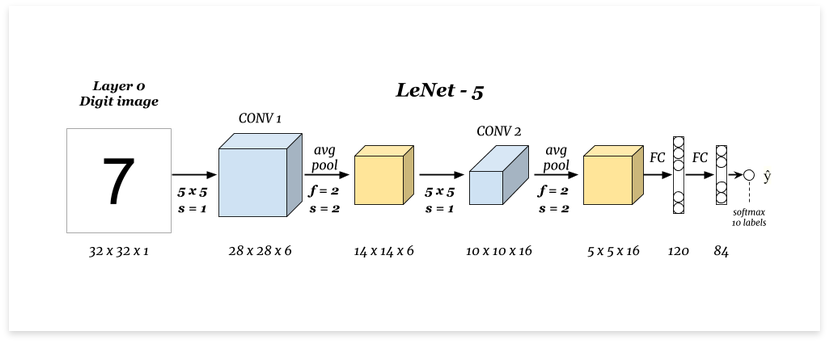

In [43]:
class Bai_toan_nhan_dang_so_voi_Lenet5():
  def __init__(self, x_train, y_train, x_test, y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def preprocessing(self):
    self.x_train = self.x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    self.x_test = self.x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

    self.x_train = self.x_train/255.0
    self.x_test = self.x_test/255.0

    self.y_train = to_categorical(self.y_train)
    self.y_test = to_categorical(self.y_test)

    return self.x_train, self.x_test, self.y_train, self.y_test

  def fit_and_test(self):
    self.x_train, self.x_test, self.y_train, self.y_test = self.preprocessing()

    '''
        LeNet5 có 5 layer: 3 Conv và 2 FC
    '''

    model = Sequential()
    # Layer 1:
    model.add(Conv2D(6, (5, 5), input_shape = (28, 28, 1), activation = 'relu', padding = 'same'))
    model.add(AveragePooling2D((2, 2), strides = 2))

    # Layer 2:
    model.add(Conv2D(16, (5, 5), activation = 'relu'))
    model.add(AveragePooling2D((2, 2), strides = 2))

    # -------------
    model.add(Flatten())
    # -------------

    # Layer 3:
    model.add(Dense(120, activation = 'relu'))

    # Layer 4:
    model.add(Dense(84, activation = 'relu'))

    # Layer 5:
    model.add(Dense(10, activation = 'softmax'))

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history = model.fit(self.x_train, self.y_train, epochs = 10, batch_size = 64)
    evaluate = model.evaluate(self.x_test, self.y_test)
    return model , history, evaluate

a = Bai_toan_nhan_dang_so_voi_Lenet5(x_train, y_train, x_test, y_test)
model, history, evaluate = a.fit_and_test()

Epoch 1/10
938/938 [==============================] - 6s 4ms/step - loss: 0.2797 - accuracy: 0.9172
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0608 - accuracy: 0.9811
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0501 - accuracy: 0.9840
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0416 - accuracy: 0.9872
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0347 - accuracy: 0.9891
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0300 - accuracy: 0.9903
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0266 - accuracy: 0.9914
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0222 - accuracy: 0.9927
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0364 - accuracy: 0.9890

In [44]:
evaluate

[0.03642014041543007, 0.9890000224113464]

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_14 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_15 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_7 (Flatten)         (None, 400)               0         
                                                                 
 dense_21 (Dense)            (None, 120)              